# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the structure of the data

In [1]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
#  Useing  shape method to learn about n of rows and columns
df.shape
print('There are ',df.shape[0], 'rows and', df.shape[1], 'columns')

There are  1898 rows and 9 columns




#### Observations:
There are 1898 rows and 9 columns in the data set

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Useing  info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 9 columns with filled with 1898 non-null values; 4 of them are object data type(restaurant_name,  cuisine_type, day_of_the_wee, rating), 4 of them are integer data type (order_id, customer_id, food_preparation_time, delivery_time) and one float (cost_of_the_order)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# using isna() function with return the boolean values of True (1) if there is NaN in the data and False (0) if there are no missing values
# with sum() we summ up the result of isna() function. In case of missing valies we get non zero sum
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
We do not have missing values in this data frame

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# describe provide us with the descriptive statistics for the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


* customer_id ans order_id are not that informative veriables in numerical
format. If customer_id is object we could see which customer has larger number of orders.
*   resturant_name: there are 178 resturants in the dataframe. Shake Shack has more orders than other resturants: 219 out of 1898.
*   cusine_type: there are in total 14 cousine types. American is the moust popular 584 out of 1898 orders.
*   day_of_the_week: there are only 2 values in this column. There are more orders during Weekend (1351 out or 1898)
*   rating: There are 4 possable rating values. The moust frequent is 'Not given' (736 out of 1898).
*   cost_of_the_order: On average the cost of the order is 16.5 dollars , while the median is 14.4 dollars. Data a slightly right skewed.
* food_preparation_time: On average food preparation time is 27.37 min which is very close to the median value of 27 min. Min preparation time is 20 min and max-35 min.
* delivery_time: On average food delivery time is 24.16bmin which is very close to the median value of 25 min. Min delivery time is 15 min and max-33 min.








    
    
     
    
    
   



### **Question 5:** How many orders are not rated?

In [ ]:
df.rating.value_counts()
percent_non_ratited=(df.rating.value_counts(normalize = True)['Not given'])*100
number_non_ratited=(df.rating.value_counts()['Not given'])
print('Number of not rated ordrs is %.1f'% (number_non_ratited),'which is %.1f'%(percent_non_ratited),'% of all orders')

Number of not rated ordrs is 736.0 which is 38.8 % of all orders


#### Observations:
Number of not rated ordrs is 736.0 which is 38.8 % of all orders

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(10, 10), bins="auto",title=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='magenta')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    # Add title to the entire figure
    if title:
        plt.suptitle(title, fontsize=16)
    plt.xticks(rotation=60)
    plt.show()

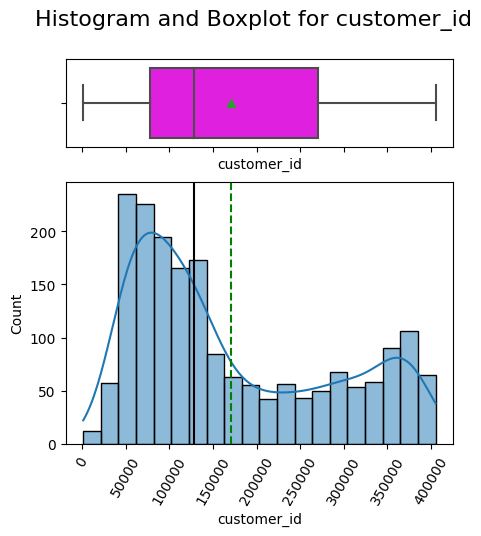

--------------------------------------------------


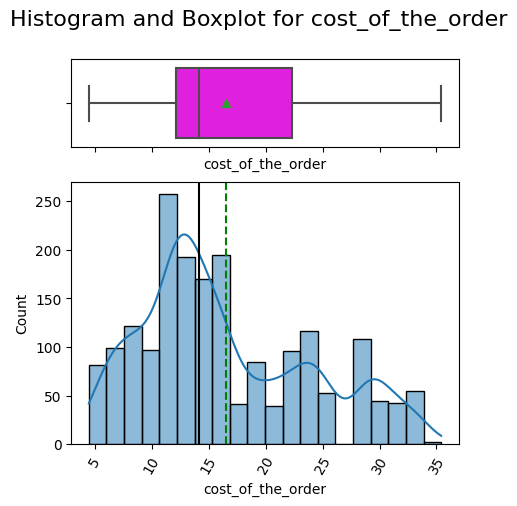

--------------------------------------------------


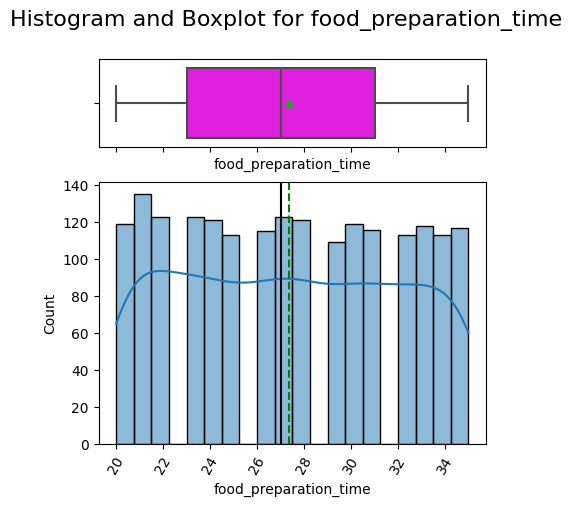

--------------------------------------------------


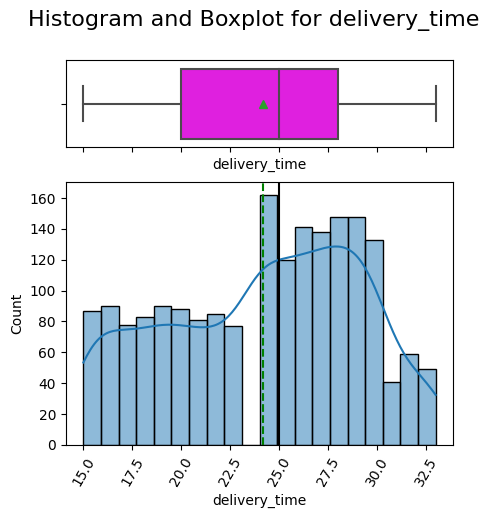

--------------------------------------------------


In [ ]:
list_of_numeric_values= ['customer_id','cost_of_the_order','food_preparation_time', 'delivery_time'] #plotting histogram and boxplot for all numerical values
for col in list_of_numeric_values:
  histogram_boxplot(df[col], figsize=(5,5), bins=20, title='Histogram and Boxplot for '+ col)
  print('-' * 50)

In [ ]:
def bar_perc(data, z, figsize=(10, 10)):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = figsize)

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 15)                  # Annotate the percentage
    plt.xticks(rotation=60, size=10)
    plt.show()                                                      # Display the plot

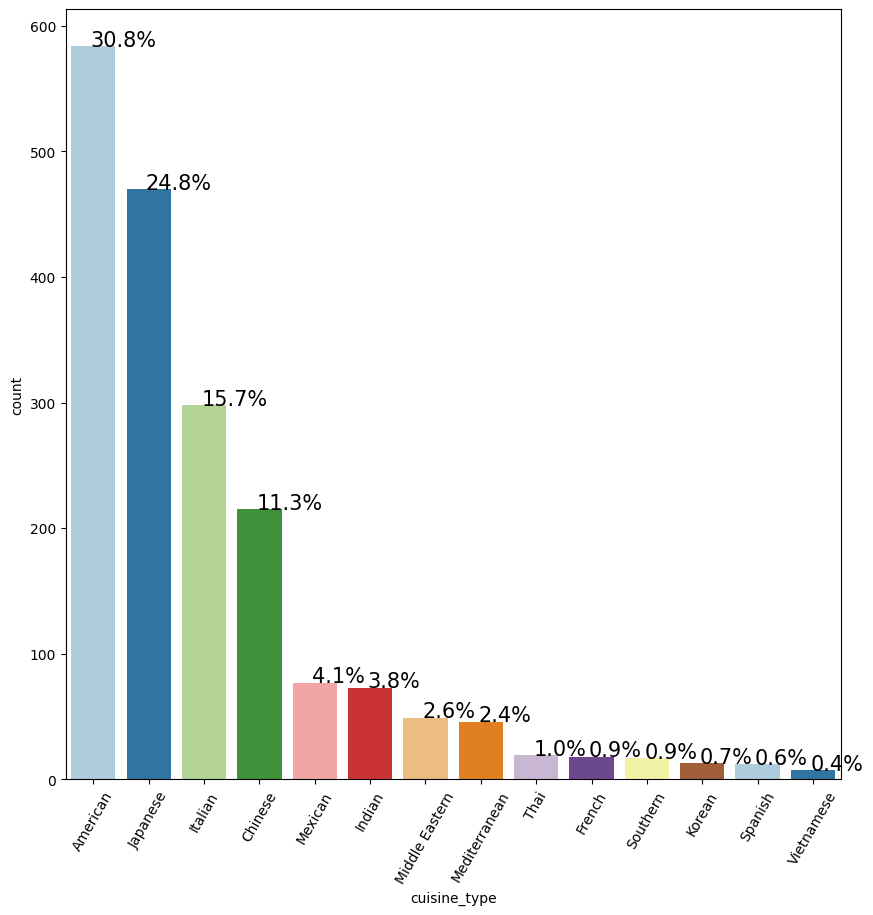

--------------------------------------------------


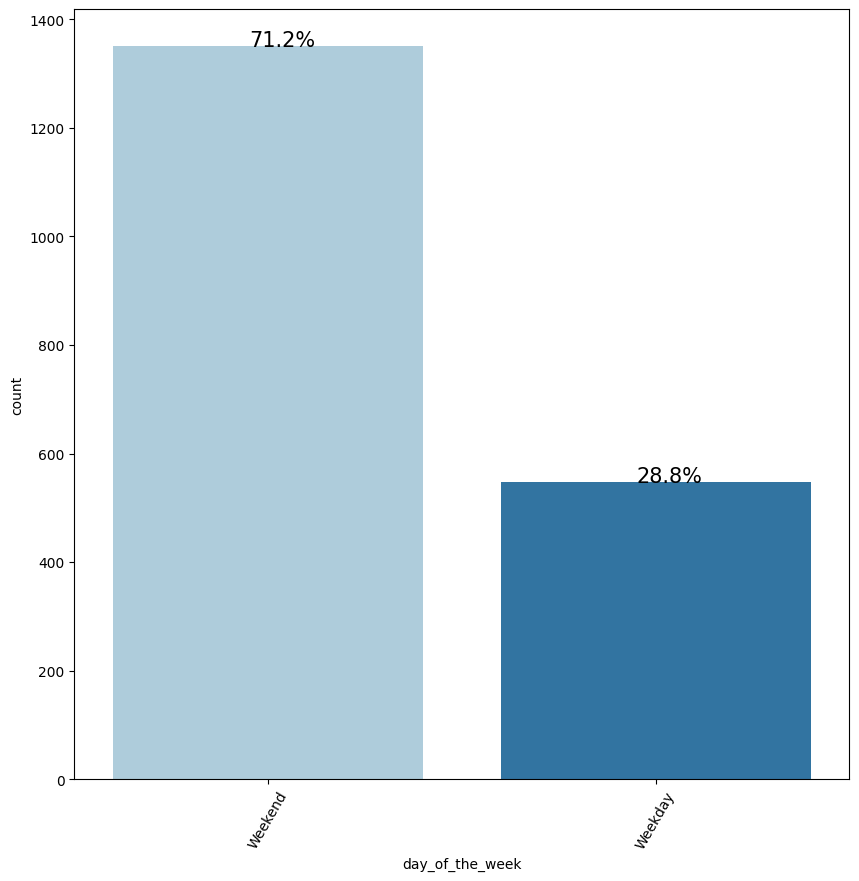

--------------------------------------------------


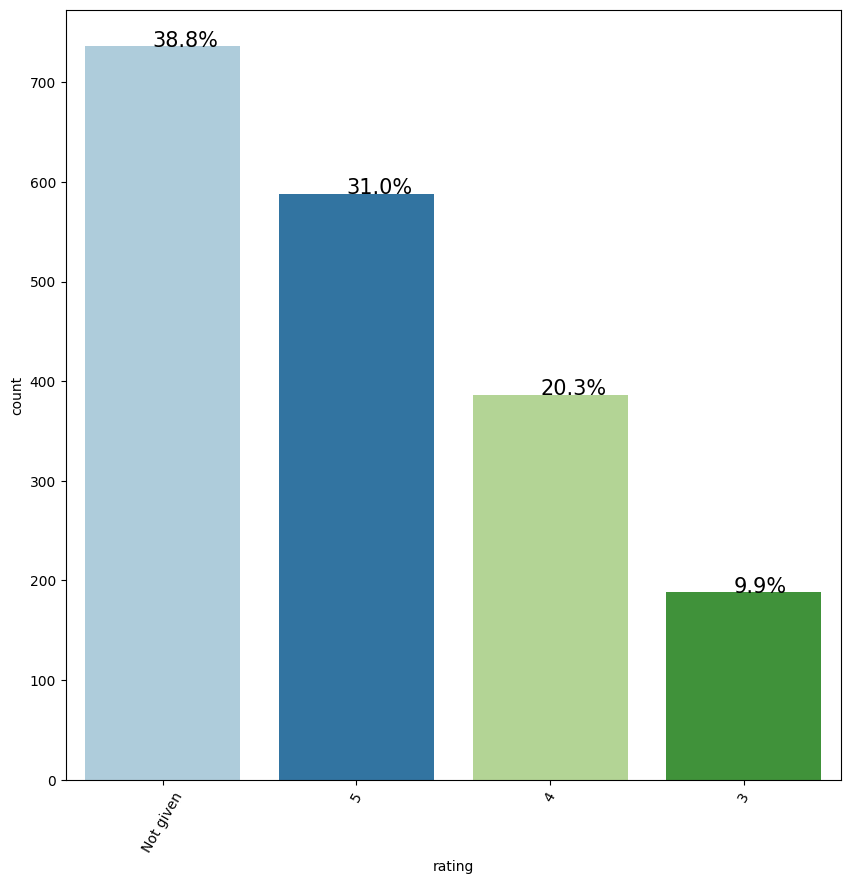

--------------------------------------------------


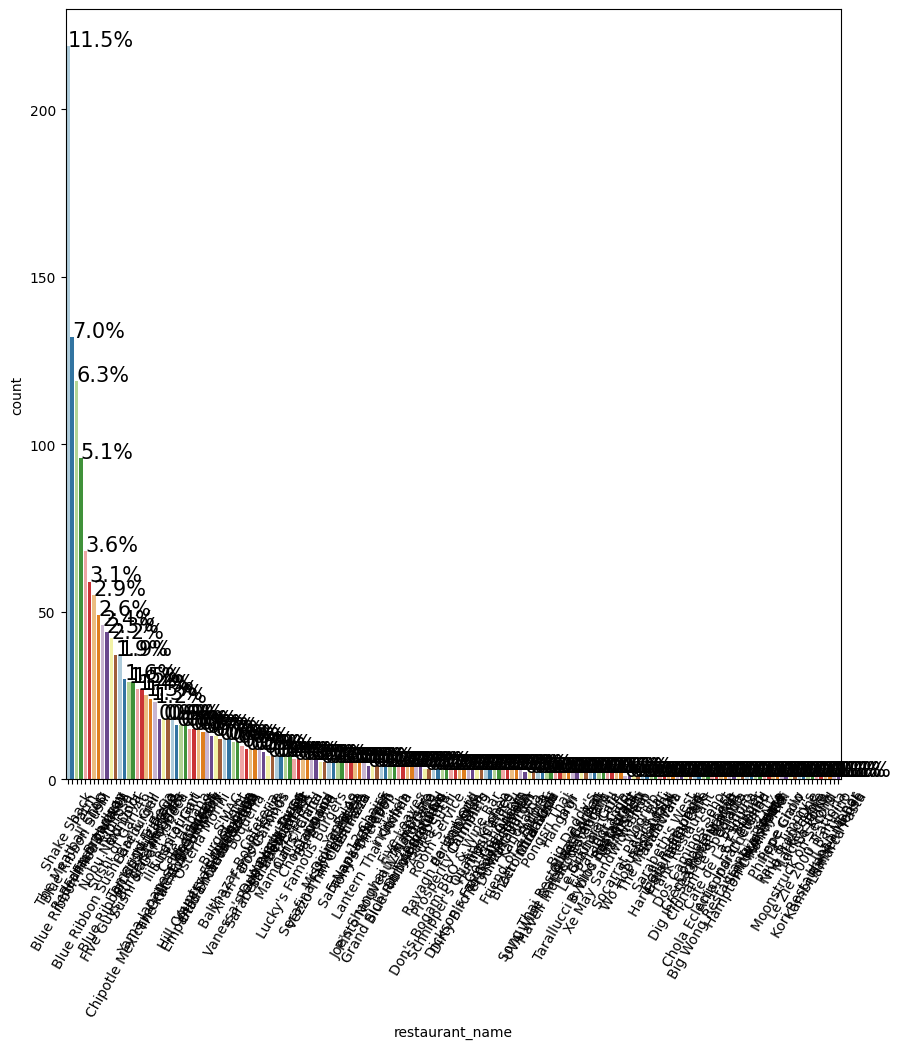

--------------------------------------------------


In [ ]:
list_of_categorical_values= ['cuisine_type', 'day_of_the_week', 'rating', 'restaurant_name'] #plotting countplot for all categorical values
for col in list_of_categorical_values:
  bar_perc(df, col)
  print('-' * 50)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

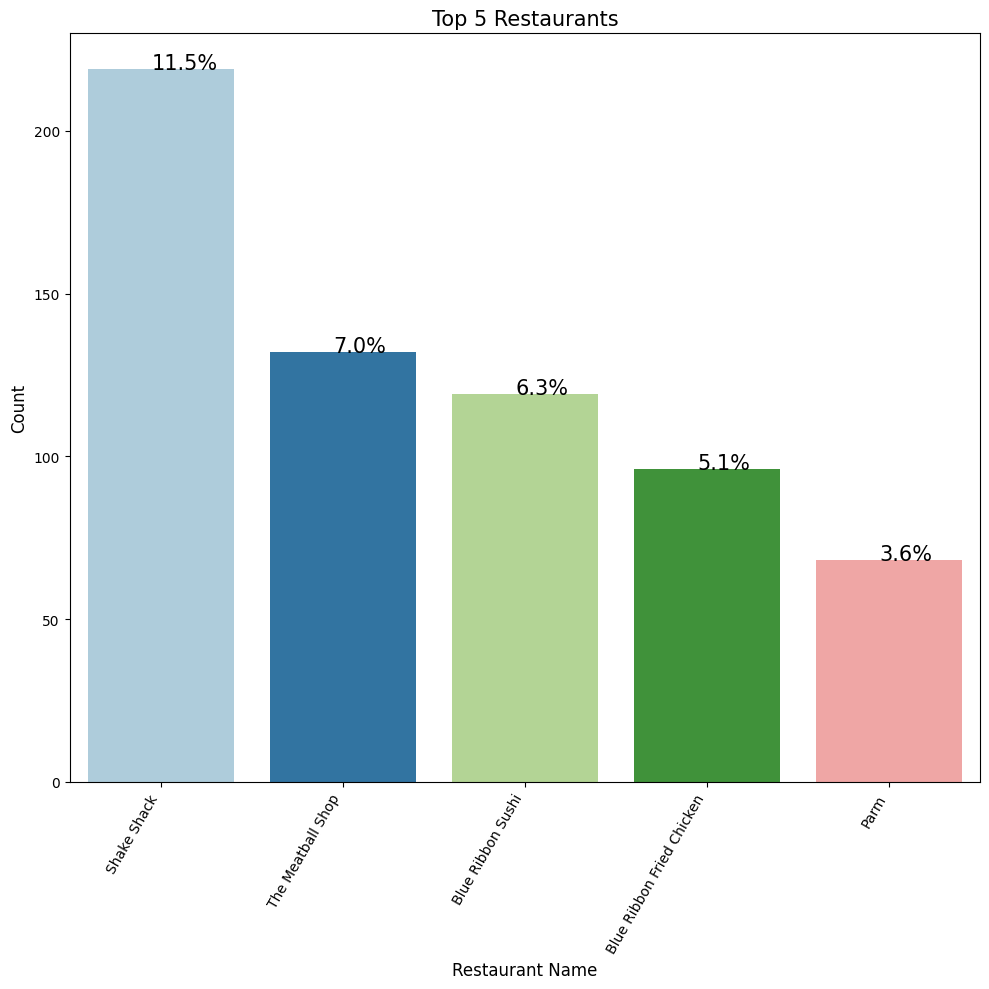

In [ ]:

# Get the top 5 restaurant names based on their counts
top_5_restaurants = df['restaurant_name'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 10 restaurants
df_top_5 = df[df['restaurant_name'].isin(top_5_restaurants)]

plt.figure(figsize=(10, 10))  # Adjust the figure size

ax = sns.countplot(x='restaurant_name', data=df_top_5, palette='Paired', order=top_5_restaurants)
total=len(df['restaurant_name'])
for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
      x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
      y = p.get_y() + p.get_height()                              # Height of the plot
      ax.annotate(percentage, (x, y), size = 15)                  # Annotate the percentage

plt.xticks(rotation=60, ha='right', size=10)  # Rotate the x-axis labels for better readability
plt.xlabel('Restaurant Name', size=12)   #xlabel
plt.ylabel('Count', size=12)   #ylabel
plt.title('Top 5 Restaurants', size=15) #title

plt.tight_layout()  # To ensure labels are not cut off
plt.show()

In [ ]:

df['restaurant_name'].value_counts().nlargest(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants are:
* Shake Shack with 219 orders (11.5 %)
* The Meatball Shop with 132 orders (7 %)
* Blue Ribbon Sushi with 119 orders (6.3 %)
* Blue Ribbon Fried Chicken with 96 orders (5.1 %)
* Parm with 68 orders (3.6 %)



### **Question 8**: Which is the most popular cuisine on weekends?

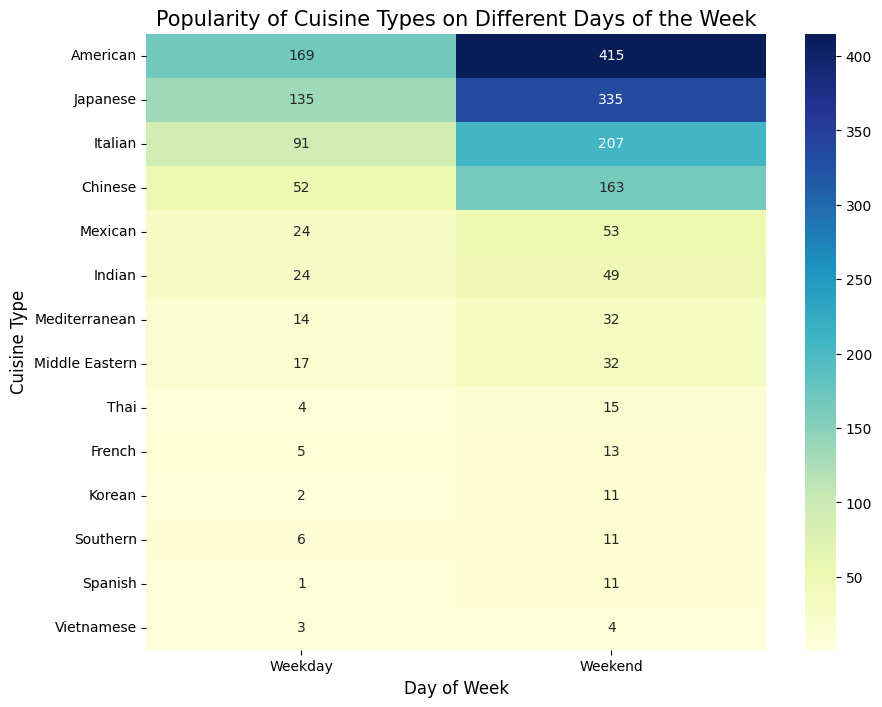

In [ ]:

grouped_data = df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='count') # grouping by and count the size
pivot_table = grouped_data.pivot(index='cuisine_type', columns='day_of_the_week', values='count').sort_values(by='Weekend', ascending=False)  # Pivot the data to create a matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu') # heatmap
plt.title('Popularity of Cuisine Types on Different Days of the Week', size=15) #title
plt.xlabel('Day of Week', size=12) #x label
plt.ylabel('Cuisine Type', size=12) #y label

plt.show()



#### Observations:

The mpst popular cusine both at the weekends and weekdays is Americal. Japanese, Italean and Chinese are on the 2d, 3d and 4d positions, respectivly


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
per_more_than_20=100*(df[df['cost_of_the_order']>20].shape[0])/df.shape[0]
# "n=%i , p=%.2f" % (n, p)
print('percentage of the orders cost more than 20 dollars is %.1f'% per_more_than_20)

percentage of the orders cost more than 20 dollars is 29.2


#### Observations:
Percentage of the orders cost more than 20 dollars is 29.2

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mdt=df['delivery_time'].mean()
print('the mean order delivery time %.1f min'%(mdt))

the mean order delivery time 24.2 min


#### Observations:
The mean order delivery time 24.2 min


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
customer_orders=df.groupby('customer_id')['order_id'].count().reset_index(name='num_orders')
sorted_custom_orders=customer_orders.sort_values(by='num_orders', ascending=False).reset_index(drop=True)
print(sorted_custom_orders.head(3))



   customer_id  num_orders
0        52832          13
1        47440          10
2        83287           9


#### Observations:
 The top 3 most frequent customers:
* 52832 with 13 orders
* 47440 with 10 orders
* 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<Axes: >

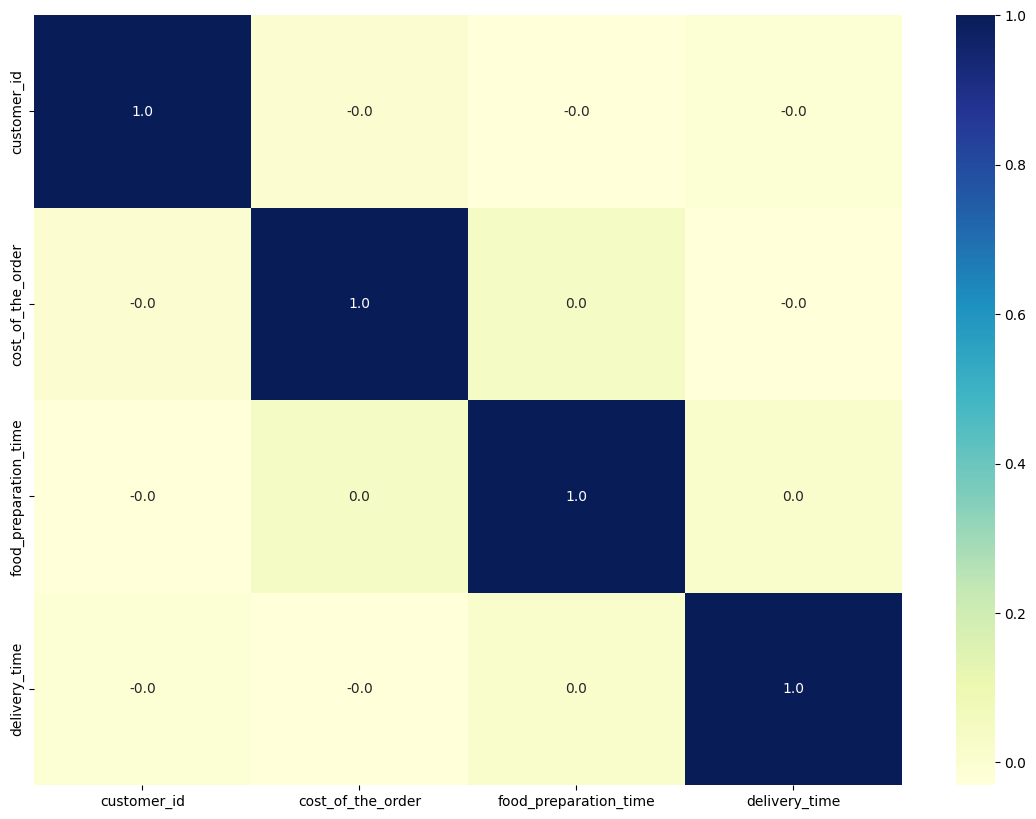

In [ ]:
# Write the code here
num_var = ['customer_id','cost_of_the_order','food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

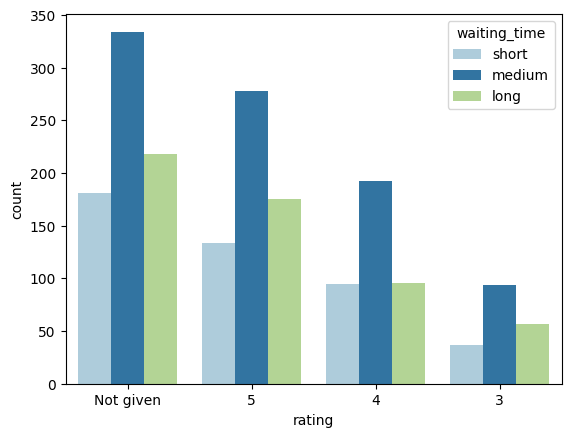

In [ ]:
# 'cost_of_the_order','food_preparation_time', 'delivery_time'   'cuisine_type', 'day_of_the_week', 'rating', 'restaurant_name'
df['total_time']= df['delivery_time']+df['food_preparation_time']
max=np.max(df['total_time'])
min=np.min(df['total_time'])
q1=np.percentile(df['total_time'], 25)
q3=np.percentile(df['total_time'], 75)
df['waiting_time'] = pd.cut(df['total_time'],bins=[min,q1,q3,max],labels=['short','medium','long'], right = False)

sns.countplot(x='rating', data=df, hue='waiting_time', palette='Paired', order=df['rating'].value_counts().index)
plt.show()




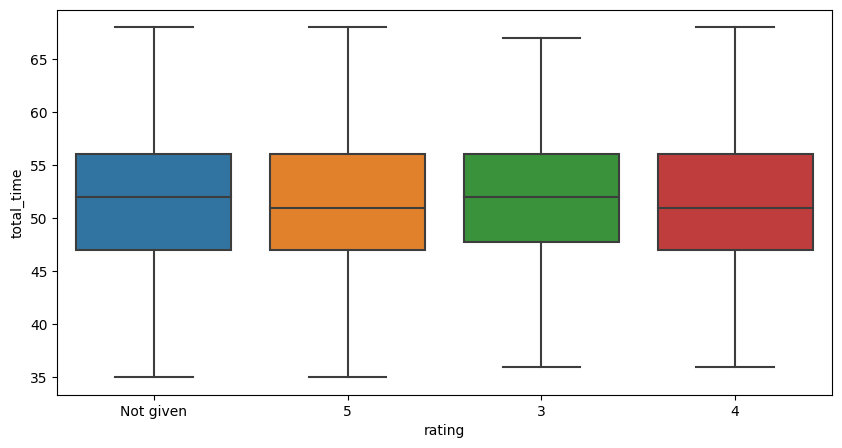

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='rating',y='total_time',showfliers=False)
plt.show()

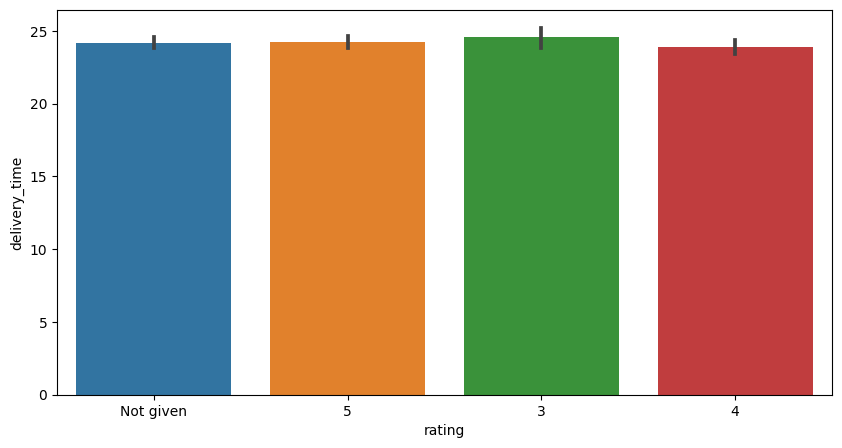

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='rating',y='delivery_time')
plt.show()

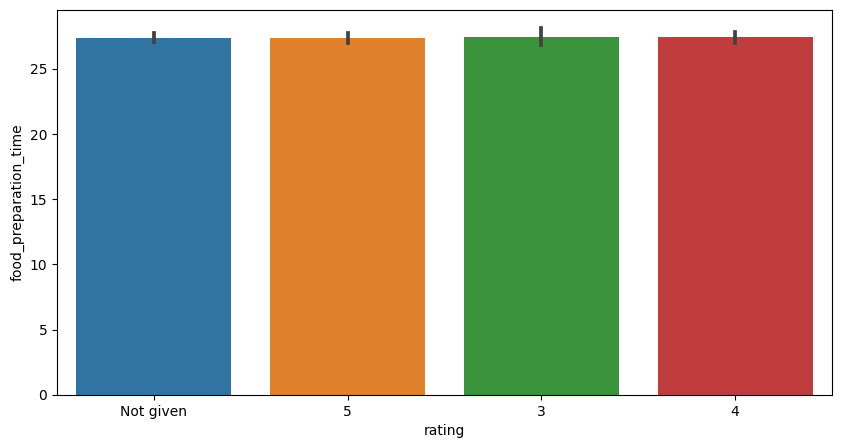

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='rating',y='food_preparation_time')
plt.show()

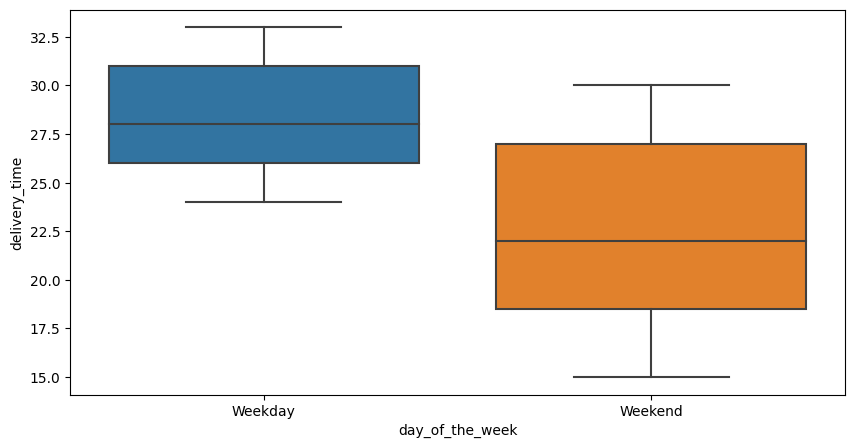

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

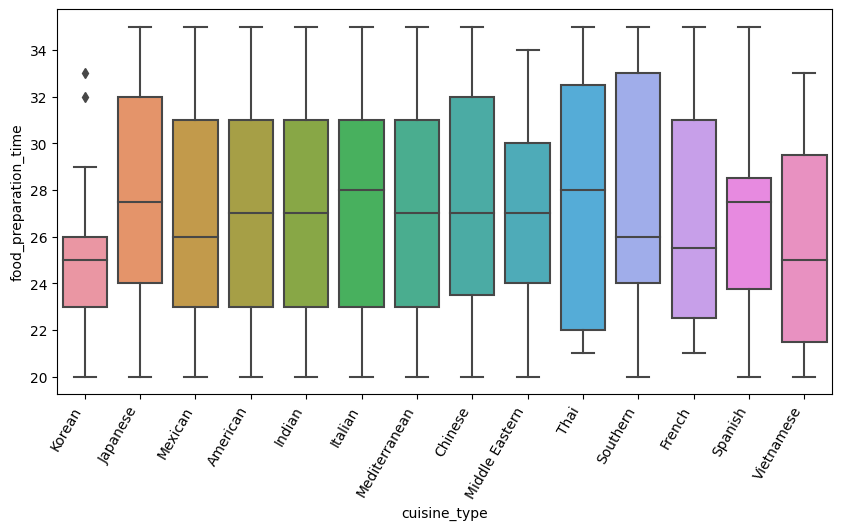

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=60, ha='right', size=10)
plt.show()

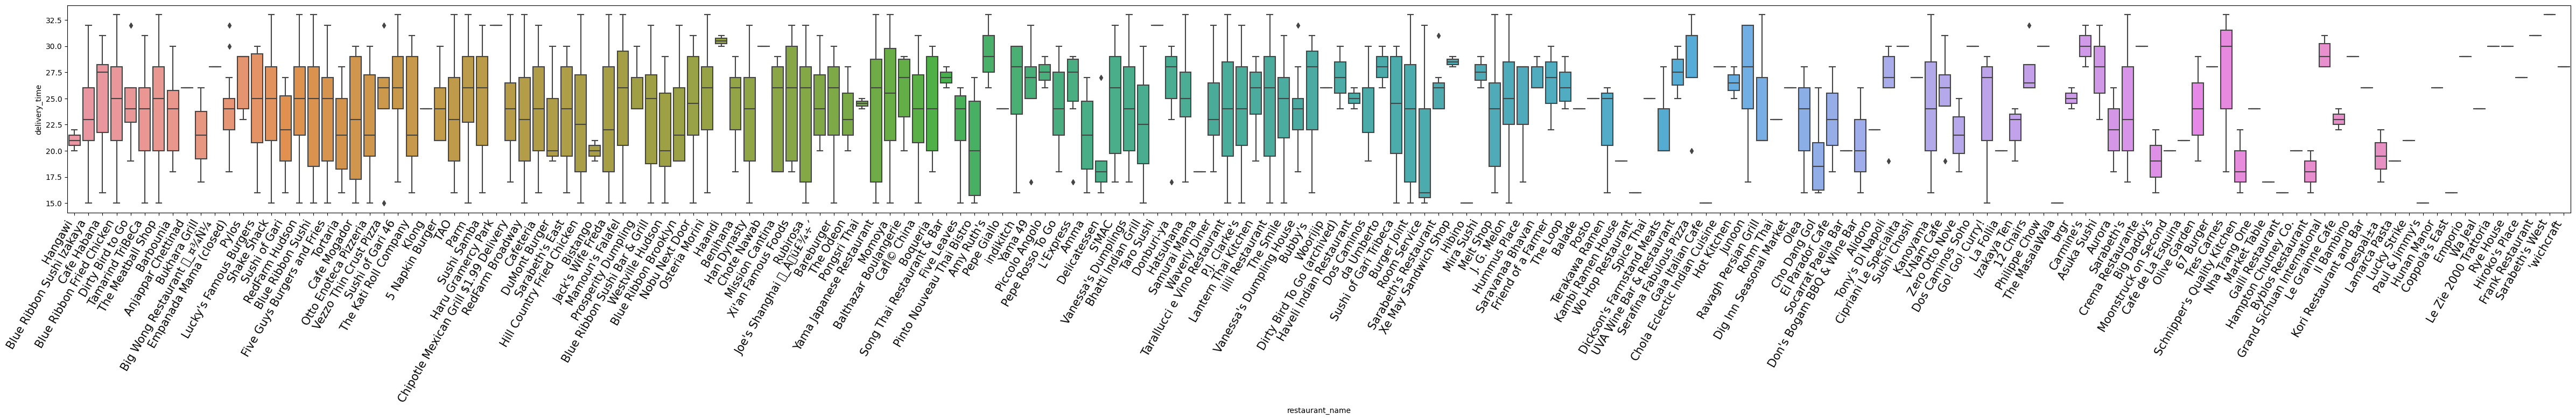

In [ ]:
plt.figure(figsize=(60,5))
sns.boxplot(data=df,x='restaurant_name',y='delivery_time')
plt.xticks(rotation=60, ha='right', size=15)
plt.show()

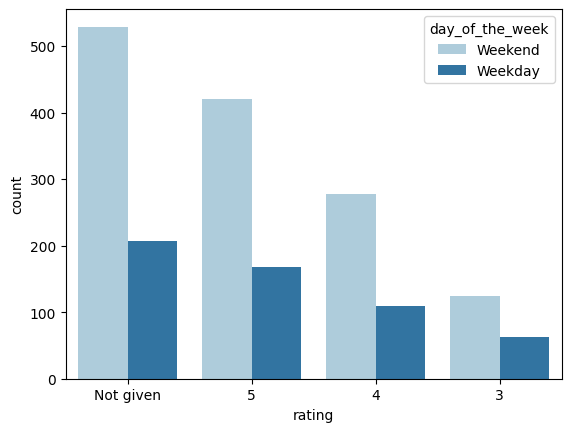

In [ ]:
sns.countplot(x='rating', data=df, hue='day_of_the_week', palette='Paired', order=df['rating'].value_counts().index)
plt.show()

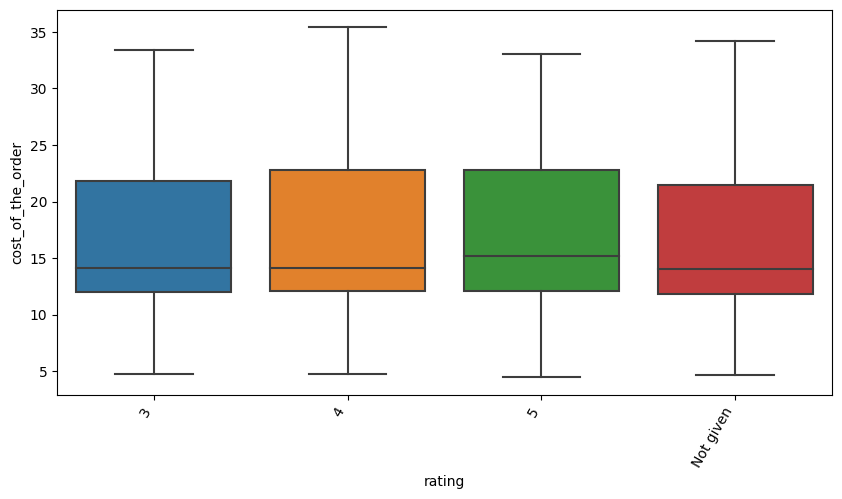

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='rating',y='cost_of_the_order')
plt.xticks(rotation=60, ha='right', size=10)
plt.show()

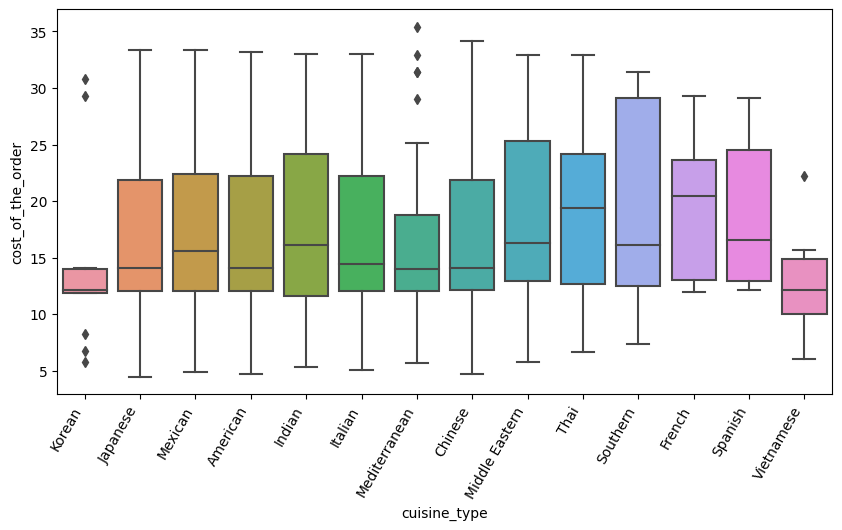

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=60, ha='right', size=10)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
df_rating=df.copy()
df_rating['rating']=df_rating['rating'].replace(['Not given'],np.nan)
df_rating['rating']=df_rating['rating'].astype(float)
df_rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
df_rating.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [ ]:
len(df_rating['restaurant_name'].unique())

178

In [ ]:
df_rating_no_nan=df_rating.dropna()
df_rating_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 90.8+ KB


In [ ]:
df_rating_no_nan['rating'].unique()

array([5., 3., 4.])

In [ ]:
len(df_rating_no_nan['restaurant_name'].unique())

156

In [ ]:
df_rating_no_nan.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df_rating_no_nan.groupby('day_of_the_week')['rating'].median().reset_index(name='avg') #exploring dependance of rating from the day of the week

,day_of_the_week,avg
0,Weekday,4.0
1,Weekend,5.0


In [ ]:
df_rating_no_nan.groupby(['cuisine_type', 'day_of_the_week'])['rating'].mean().reset_index(name='avg') #exploring dependance of rating from the day of the week

,cuisine_type,day_of_the_week,avg
0,American,Weekday,4.252252
1,American,Weekend,4.319066
2,Chinese,Weekday,4.230769
3,Chinese,Weekend,4.364486
4,French,Weekday,4.500000
5,French,Weekend,4.250000
6,Indian,Weekday,4.428571
7,Indian,Weekend,4.583333
8,Italian,Weekday,4.403226
9,Italian,Weekend,4.336364


<Axes: >

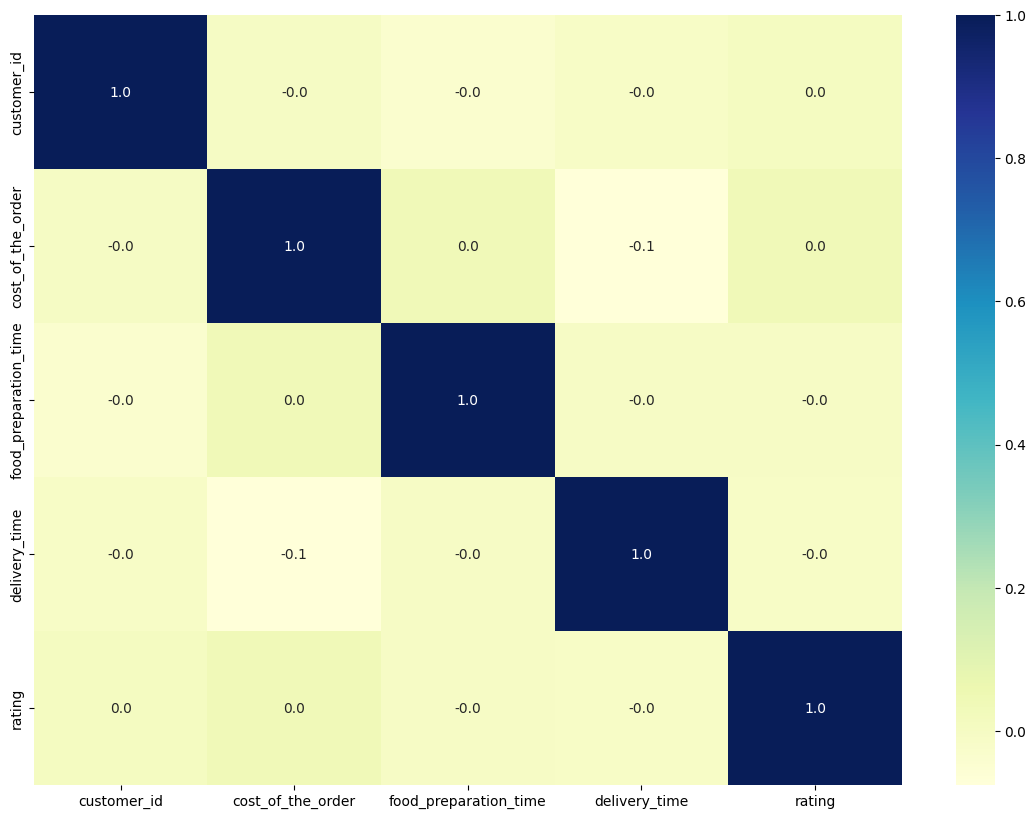

In [ ]:
num_var = ['customer_id','cost_of_the_order','food_preparation_time', 'delivery_time', 'rating']
corr = df_rating_no_nan[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

In [ ]:
rating_sum=df_rating_no_nan.groupby('restaurant_name')['rating'].count().reset_index(name='num_reviews')
rating_avg=df_rating_no_nan.groupby('restaurant_name')['rating'].mean().reset_index(name='avg')
count_and_avg=rating_sum.merge(rating_avg, on='restaurant_name')
promotional_offer=count_and_avg.loc[(count_and_avg['num_reviews']>50)&(count_and_avg['avg']>4)].reset_index(drop=True)
print(promotional_offer)



             restaurant_name  num_reviews       avg
0  Blue Ribbon Fried Chicken           64  4.328125
1          Blue Ribbon Sushi           73  4.219178
2                Shake Shack          133  4.278195
3          The Meatball Shop           84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
def charge(k, a=20,charge1=0.25, b=5, charge2=0.15):
  '''
   this function calculates the how much the company charge resturants denending on cost of the order
   k-is the cost of the order, a-is price in dollars which higher than which we charge charge1 part of the cost
   b-is price in dollars which higher than which we charge charge2 part of the cost
  '''
  if k > a:
    return k*charge1
  elif k > b:
    return k*charge2
  else:
    return 0.0

charge(21)

5.25

In [ ]:
# Write the code here
length = len(df)
df['net_revenue']= [None] * length
df['rest_revenue']=[None] * length
for  i, x in enumerate(df['cost_of_the_order']):
   df['net_revenue'][i]=charge(x)
   df['rest_revenue'][i]=x-charge(x)

print( 'Restoran net revenue is %.1f dollars'%(df['rest_revenue'].sum()), 'and delivery compamy net revenue from orders is %1.f dollars'%(df['net_revenue'].sum()))

assert abs((df['cost_of_the_order'].sum())-(df['rest_revenue'].sum()+df['net_revenue'].sum())) < 1e-6, "Error: Total cost of the order does not match with summ of net revenue and charge!"




Restoran net revenue is 25148.5 dollars and delivery compamy net revenue from orders is 6166 dollars


#### Observations:


 The compamy net revenue from orders is 6166 dollars the restoran net revenue is 25148.5 dollars and



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

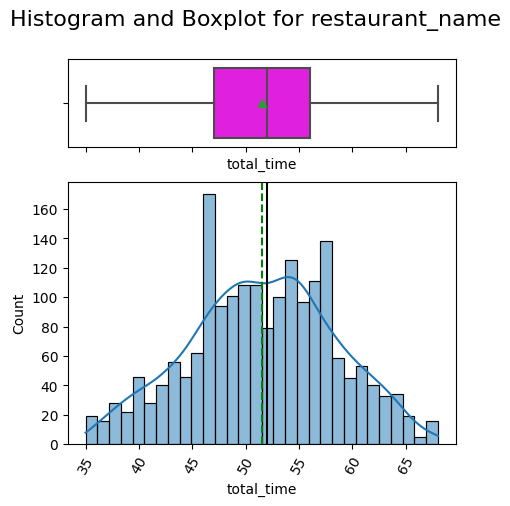

In [ ]:
# Write the code here
histogram_boxplot(df['total_time'], figsize=(5,5), bins=30, title='Histogram and Boxplot for '+ col)

In [ ]:
per_60_min_order=(len(df['total_time'].loc[df['total_time']>60])/len(df['total_time']))*100
print('percentage of orders take more than 60 minutes to get delivered from the time the order is placed is %.1f'%(per_60_min_order),'%')

percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.5 %


#### Observations:
Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.5 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

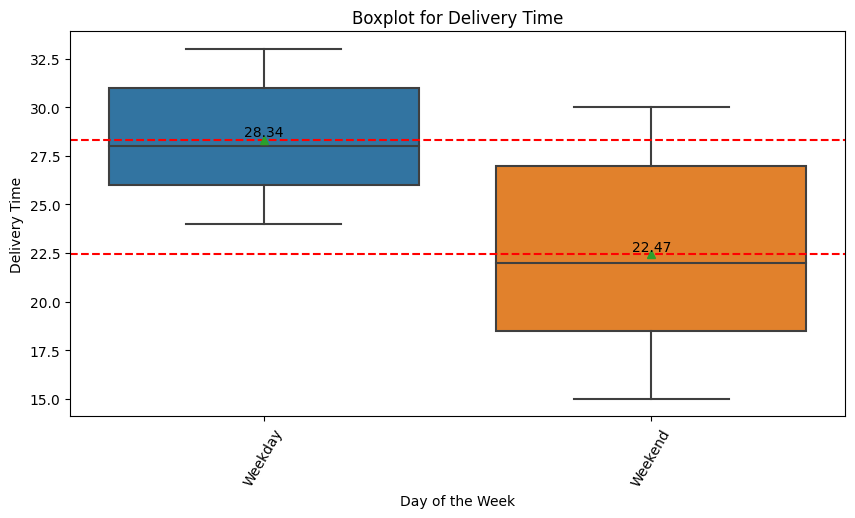

In [ ]:
# Write the code here

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', showmeans=True)

# Calculate the mean delivery time for each day_of_the_week group
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index(name='mean')

plt.xticks(rotation=60)
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Boxplot for Delivery Time')

for i, mean in enumerate(mean_delivery_time['mean']):
    plt.axhline(y=mean, color='red', linestyle='dashed', label=f'Mean - {mean:.2f}' if i == 0 else '')
    plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom')


plt.show()

In [ ]:
diff=abs((mean_delivery_time['mean'][0])-(mean_delivery_time['mean'][1]))
print('The mean delivery time in weekday is %.1f min'%(mean_delivery_time['mean'][0]), 'which is %.1f min' %(diff), 'longer then weekend delivery time of %.1f min'%(mean_delivery_time['mean'][1]))


The mean delivery time in weekday is 28.3 min which is 5.9 min longer then weekend delivery time of 22.5 min


#### Observations:
The mean delivery time in weekday is 28.3 min which is 5.9 min longer then weekend delivery time of 22.5 min

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  At the weekend there are more orders
*  The most popular cousins are:  Americal. Japanese, Italean and Chinese
*  The average rating is higher at the Weekends
*  The delivery time is shorter at the Weekends than in Weekdays. The delivry time has slight negative effect of the rating


### Recommendations:

*  Try to optimise delivery time at the Weekdays


---